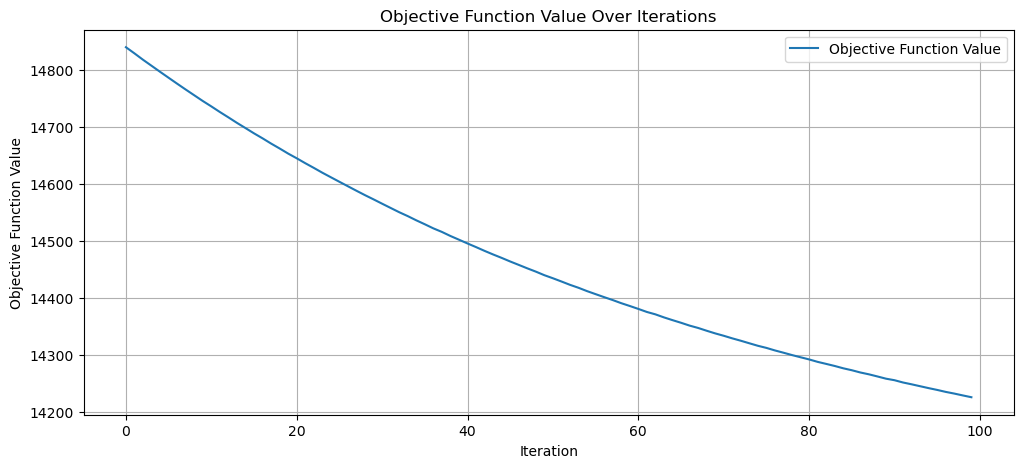

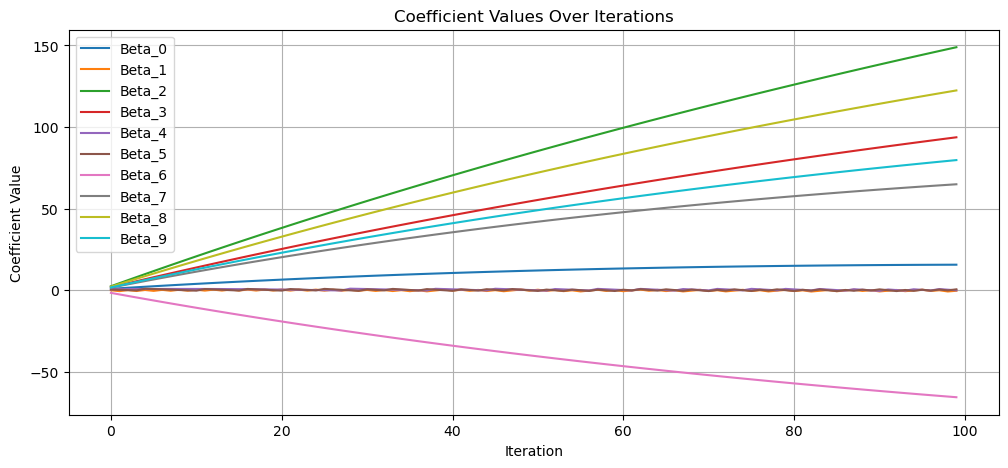

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

class DualGradientMethod:
    def __init__(self, objective, gradient, initial_x, initial_L, gamma_u, gamma_d, max_iter):
        self.objective = objective
        self.gradient = gradient
        self.x = initial_x
        self.L = initial_L
        self.gamma_u = gamma_u
        self.gamma_d = gamma_d
        self.max_iter = max_iter
        self.objective_values = []
        self.beta_values = []

    def G(self, x, L):
        M = L
        while True:
            grad = self.gradient(x)
            T = x - grad / M
            if self.objective(T) <= self.objective(x) - 0.5 * M * np.linalg.norm(grad) ** 2:
                break
            M *= self.gamma_u
        return T, M

    def optimize(self):
        for _ in range(self.max_iter):
            T, M = self.G(self.x, self.L)
            self.L = max(self.L, M / self.gamma_d)
            a = 1 / M
            self.x = self.x - a * self.gradient(self.x)
            self.objective_values.append(self.objective(self.x))
            self.beta_values.append(self.x.copy())

        return self.x, self.objective_values, np.array(self.beta_values)

# Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def lasso_objective(X, y, beta, lambda_):
    n = len(y)
    residual = y - np.dot(X, beta)
    loss = 0.5 * np.dot(residual, residual) / n
    penalty = lambda_ * np.linalg.norm(beta, 1)
    return loss + penalty

def lasso_gradient(X, y, beta, lambda_):
    n = len(y)
    residual = y - np.dot(X, beta)
    gradient_loss = -np.dot(X.T, residual) / n
    gradient_penalty = lambda_ * np.sign(beta)
    return gradient_loss + gradient_penalty

# Parameters
lambda_ = 0.6
initial_beta = np.zeros(X_train.shape[1])
initial_L = 1.0
gamma_u = 2.5  ## HAS TO BE GREATER THAN 2 AND LESS THAN 3
gamma_d = 2.0
max_iter = 100

dgm = DualGradientMethod(
    objective=lambda beta: lasso_objective(X_train, y_train, beta, lambda_),
    gradient=lambda beta: lasso_gradient(X_train, y_train, beta, lambda_),
    initial_x=initial_beta,
    initial_L=initial_L,
    gamma_u=gamma_u,
    gamma_d=gamma_d,
    max_iter=max_iter
)

vk, objective_values, beta_values = dgm.optimize()

# Plotting the objective function values
plt.figure(figsize=(12, 5))
plt.plot(objective_values, label='Objective Function Value')
plt.title('Objective Function Value Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the beta coefficients over iterations
plt.figure(figsize=(12, 5))
n_features = X_train.shape[1]
for i in range(n_features):
    plt.plot(beta_values[:, i], label=f'Beta_{i}')
plt.title('Coefficient Values Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()
